In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
CHESSBOARD = (8, 6) # internal corners (cols, rows)
SQUARE_SIZE = 25.0  # mm
CAMERA = 'dslr'
PATH = './calibration'
SAVE_PATH = f'{PATH}/{CAMERA}/calib_data_{CAMERA}.npz'

In [3]:
objp = np.zeros((CHESSBOARD[1] * CHESSBOARD[0], 3), np.float32)
objp[:, :2] = np.mgrid[0:CHESSBOARD[0], 0:CHESSBOARD[1]].T.reshape(-1, 2)
objp *= SQUARE_SIZE

objpoints = []
imgpoints = []

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-3)

calibrated = False
undistort_live = False
camera_matrix = None
dist_coeffs = None
mapx = None
mapy = None
roi = None
img_size = None
rms_err = None

./calibration/dslr/images/IMG_9480.JPG


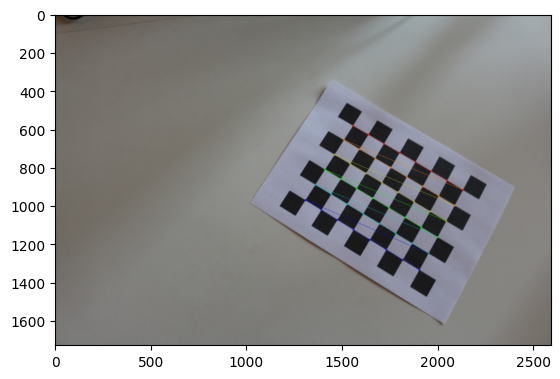

./calibration/dslr/images/IMG_9475.JPG


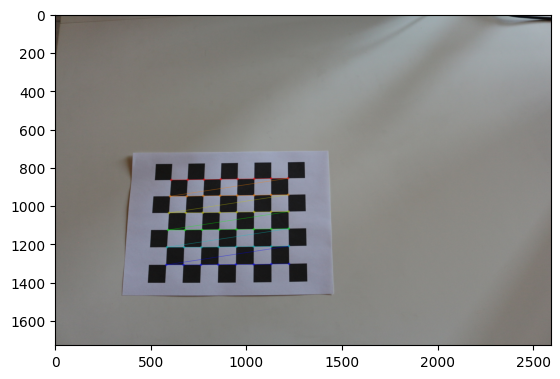

./calibration/dslr/images/IMG_9488.JPG


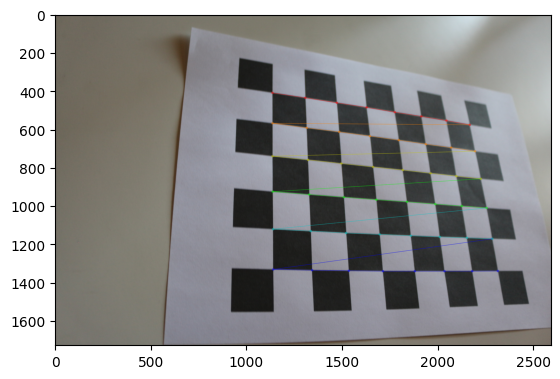

./calibration/dslr/images/IMG_9491.JPG


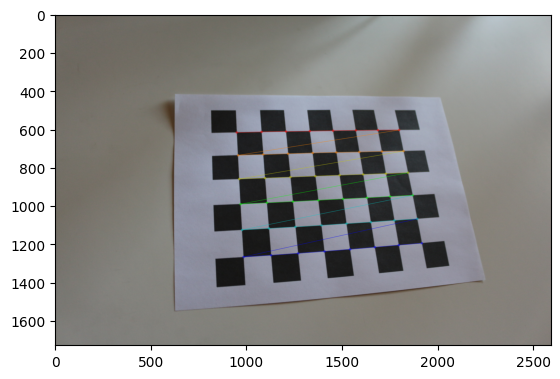

./calibration/dslr/images/IMG_9477.JPG


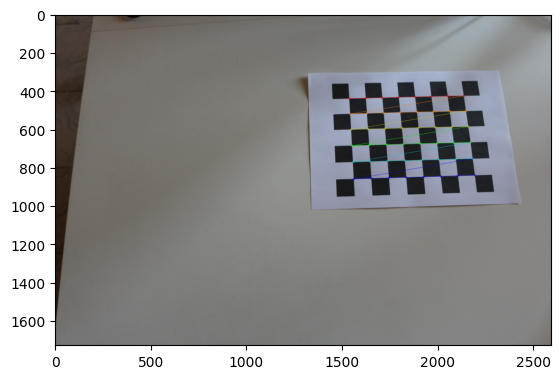

./calibration/dslr/images/IMG_9489.JPG


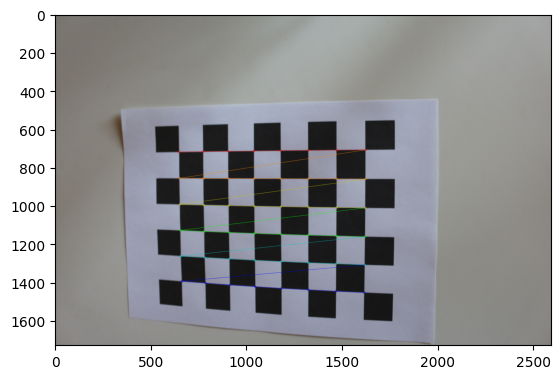

./calibration/dslr/images/IMG_9481.JPG


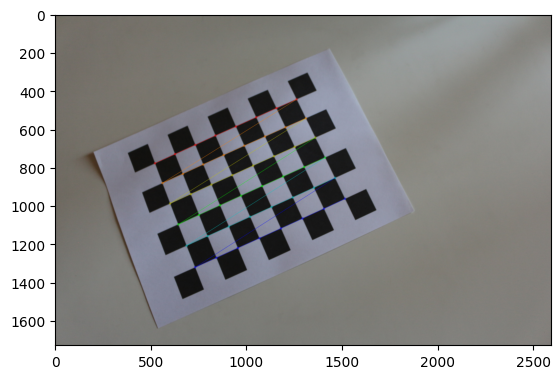

./calibration/dslr/images/IMG_9483.JPG


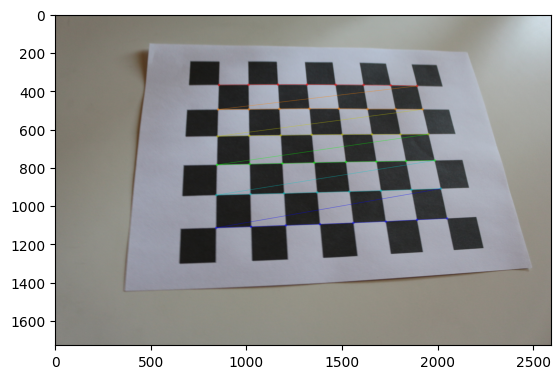

./calibration/dslr/images/IMG_9482.JPG


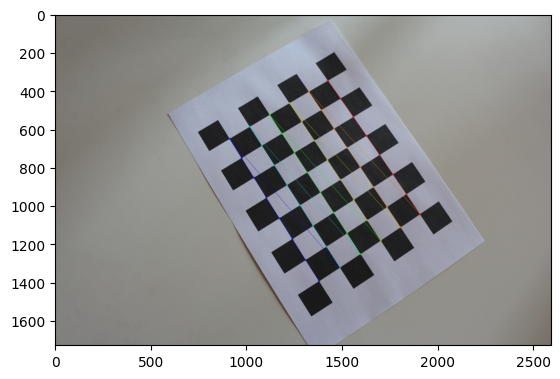

./calibration/dslr/images/IMG_9485.JPG


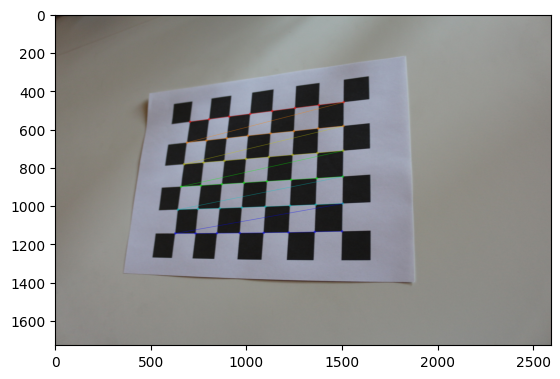

./calibration/dslr/images/IMG_9478.JPG


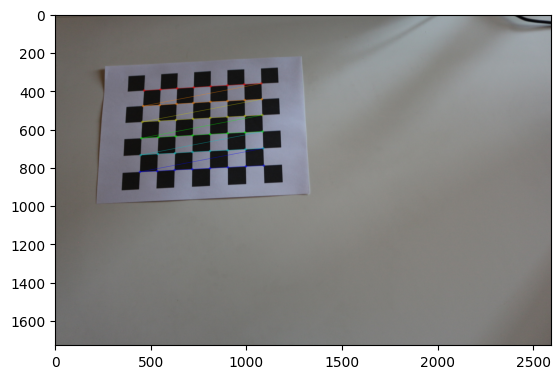

./calibration/dslr/images/IMG_9487.JPG


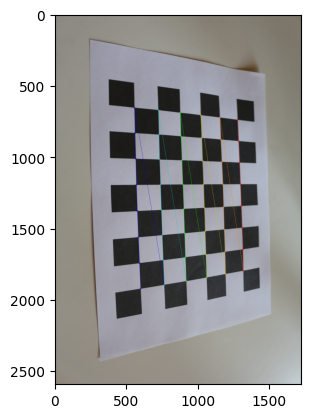

./calibration/dslr/images/IMG_9484.JPG


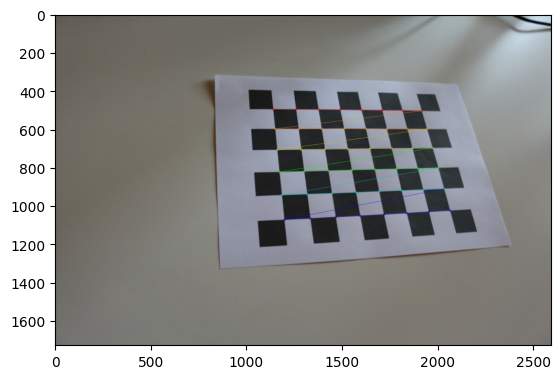

./calibration/dslr/images/IMG_9479.JPG


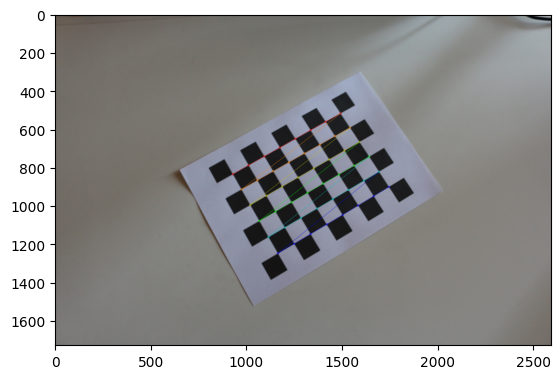

./calibration/dslr/images/IMG_9476.JPG


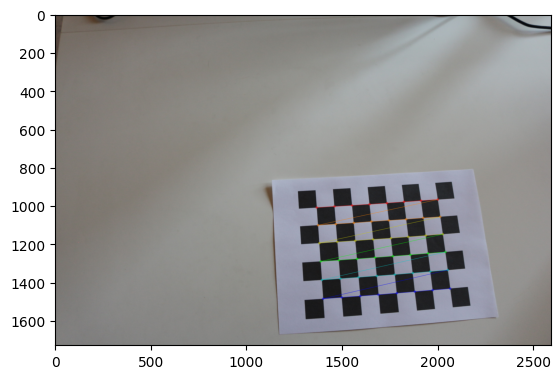

./calibration/dslr/images/IMG_9486.JPG


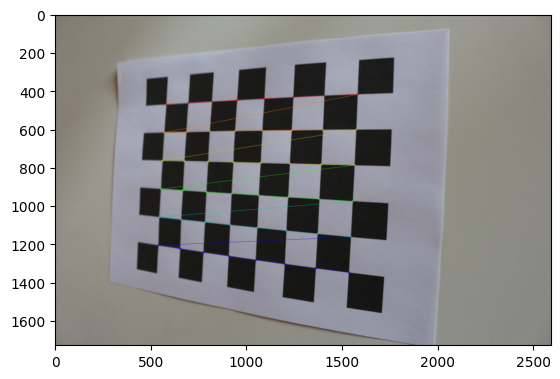

./calibration/dslr/images/IMG_9492.JPG


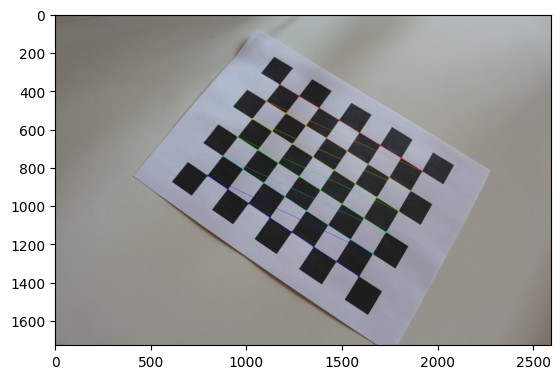

RMS error: 1.4651
[[2.24755274e+03 0.00000000e+00 1.23434660e+03]
 [0.00000000e+00 2.27349711e+03 8.86374521e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-0.26687266  0.36842917 -0.00656342  0.00211479 -0.5688722 ]]
Saved in ./calibration/dslr/calib_data_dslr.npz


In [4]:
for image_path in glob.glob(f'{PATH}/{CAMERA}/images/*'):
    print(image_path)
    frame = cv2.imread(image_path)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if img_size is None:
        img_size = (gray.shape[1], gray.shape[0])

    found, corners = cv2.findChessboardCorners(
        gray, CHESSBOARD,
        flags=cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE
    )

    if found:
        corners_refined = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        cv2.drawChessboardCorners(frame, CHESSBOARD, corners_refined, found)

        objpoints.append(objp.copy())
        imgpoints.append(corners_refined)
    
    plt.figure()
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()

rms_err, camera_matrix, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
print(f'RMS error: {rms_err:.4f}')

new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(
    camera_matrix, dist_coeffs, img_size, 0, img_size
)

# Undistort map
mapx, mapy = cv2.initUndistortRectifyMap(
    camera_matrix, dist_coeffs, None, new_camera_matrix, img_size, cv2.CV_32FC1
)

print(camera_matrix)
print(dist_coeffs)

# Save
np.savez(SAVE_PATH,
         camera_matrix=camera_matrix,
         dist_coeffs=dist_coeffs,
         image_size=img_size,
         rms=rms_err,
         chessboard_cols=CHESSBOARD[0],
         chessboard_rows=CHESSBOARD[1],
         square_size=SQUARE_SIZE,
         samples=len(objpoints))
print(f'Saved in {SAVE_PATH}')